<a href="https://colab.research.google.com/github/shreshtha77/CVIP-Data-Science/blob/main/Phase%201/Golden%20Task/Breast_Cancer_Prediction_CodersCave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction

Project while working as Data science intern at CodersCave

(Golden Task)

## Importing libraries

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Loading the data

In [168]:
breast_cancer_data = pd.read_csv("/content/breastCancer.csv")

In [169]:
print(breast_cancer_data)

          id  clump_thickness  size_uniformity  shape_uniformity  \
0    1000025                5                1                 1   
1    1002945                5                4                 4   
2    1015425                3                1                 1   
3    1016277                6                8                 8   
4    1017023                4                1                 1   
..       ...              ...              ...               ...   
694   776715                3                1                 1   
695   841769                2                1                 1   
696   888820                5               10                10   
697   897471                4                8                 6   
698   897471                4                8                 8   

     marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                    1                2             1                3   
1                    5             

## Pre-processing the data

In [170]:
breast_cancer_data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [171]:
breast_cancer_data.tail()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [172]:
breast_cancer_data.shape

(699, 11)

In [173]:
breast_cancer_data.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [174]:
breast_cancer_data.isnull()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [175]:
breast_cancer_data.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [176]:
breast_cancer_data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

**2 => Benign**

**4 => Malignant**

In [177]:
breast_cancer_data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [178]:
breast_cancer_data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [179]:
breast_cancer_data[breast_cancer_data['bare_nucleoli'] == '?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [180]:
breast_cancer_data[breast_cancer_data['bare_nucleoli'] == '?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [181]:
digits_in_bare_nucleoli = pd.DataFrame(breast_cancer_data.bare_nucleoli.str.isdigit())

In [182]:
print(digits_in_bare_nucleoli)

     bare_nucleoli
0             True
1             True
2             True
3             True
4             True
..             ...
694           True
695           True
696           True
697           True
698           True

[699 rows x 1 columns]


In [183]:
breast_cancer_data_df = breast_cancer_data.replace('?', np.nan)
print(breast_cancer_data_df)

          id  clump_thickness  size_uniformity  shape_uniformity  \
0    1000025                5                1                 1   
1    1002945                5                4                 4   
2    1015425                3                1                 1   
3    1016277                6                8                 8   
4    1017023                4                1                 1   
..       ...              ...              ...               ...   
694   776715                3                1                 1   
695   841769                2                1                 1   
696   888820                5               10                10   
697   897471                4                8                 6   
698   897471                4                8                 8   

     marginal_adhesion  epithelial_size bare_nucleoli  bland_chromatin  \
0                    1                2             1                3   
1                    5             

In [184]:
breast_cancer_data_df.tail()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [185]:
breast_cancer_data_df[breast_cancer_data_df['bare_nucleoli'] == '?'].sum()

id                   0.0
clump_thickness      0.0
size_uniformity      0.0
shape_uniformity     0.0
marginal_adhesion    0.0
epithelial_size      0.0
bare_nucleoli        0.0
bland_chromatin      0.0
normal_nucleoli      0.0
mitoses              0.0
class                0.0
dtype: float64

In [186]:
breast_cancer_data_df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [187]:
breast_cancer_data_df = breast_cancer_data_df.fillna(breast_cancer_data_df.median())

In [188]:
breast_cancer_data_df['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [189]:
breast_cancer_data_df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [190]:
breast_cancer_data_df['bare_nucleoli'] = breast_cancer_data_df['bare_nucleoli'].astype('int64')

## Analyzing the data

In [191]:
breast_cancer_data_df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [192]:
breast_cancer_data_df.drop('id', axis = 1, inplace = True)
print(breast_cancer_data_df)

     clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  6                8                 8                  1   
4                  4                1                 1                  3   
..               ...              ...               ...                ...   
694                3                1                 1                  1   
695                2                1                 1                  1   
696                5               10                10                  3   
697                4                8                 6                  4   
698                4                8                 8                  5   

     epithelial_size  bare_nucleoli  bland_chromatin  normal_nu

In [193]:
breast_cancer_data_df.tail()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [194]:
breast_cancer_data_df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [195]:
breast_cancer_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


## Plotting Graphs

<Axes: xlabel='class', ylabel='Density'>

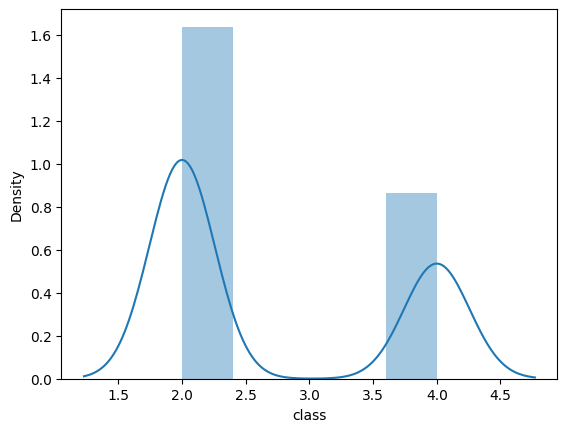

In [196]:
sns.distplot(breast_cancer_data_df['class'])

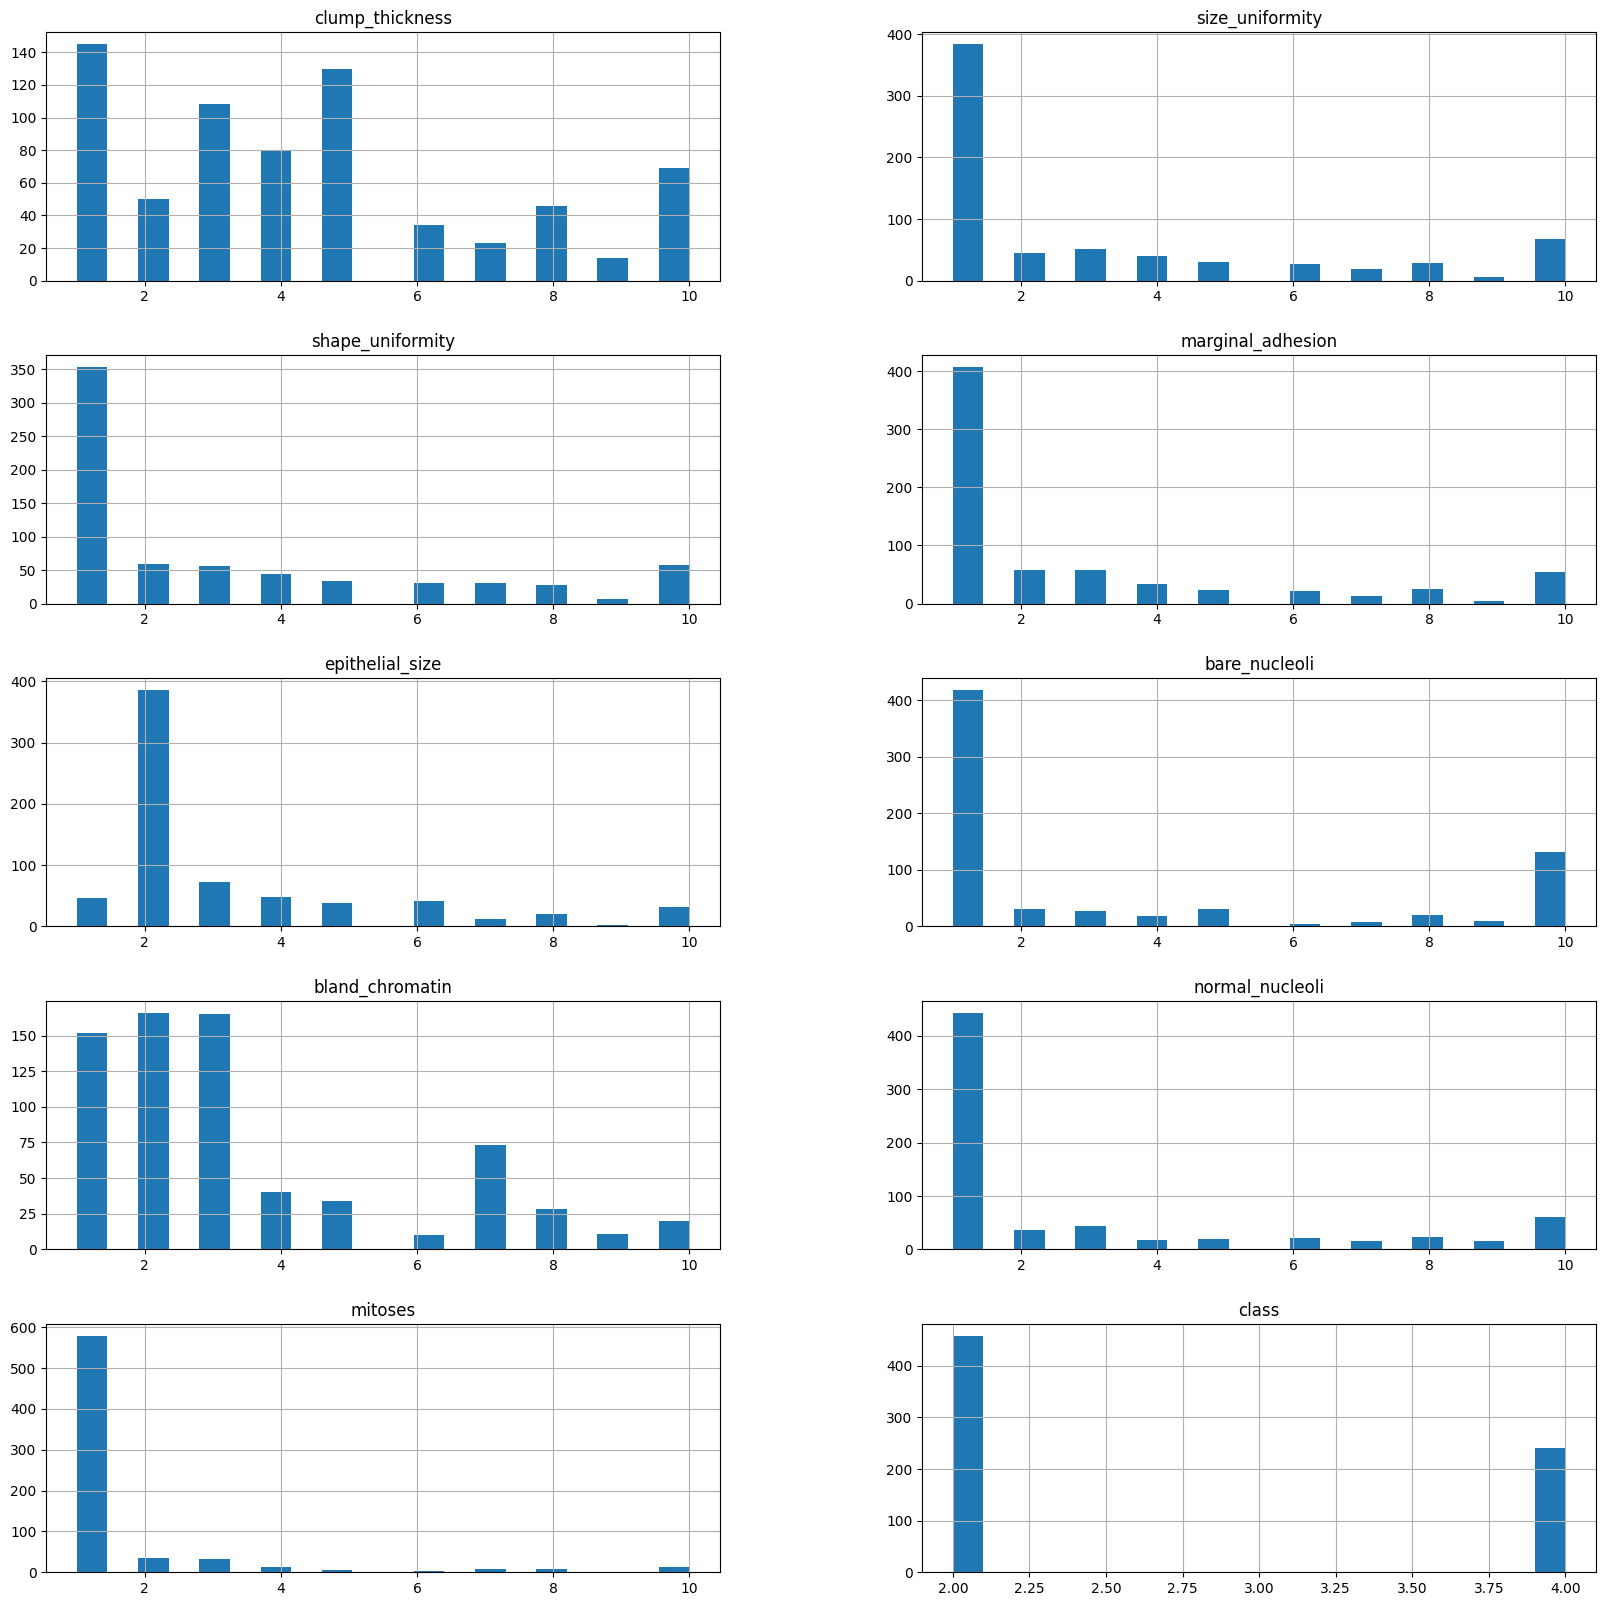

In [197]:
breast_cancer_data_df.hist(bins = 20, figsize = (20,20), layout = (5,2));

<Axes: >

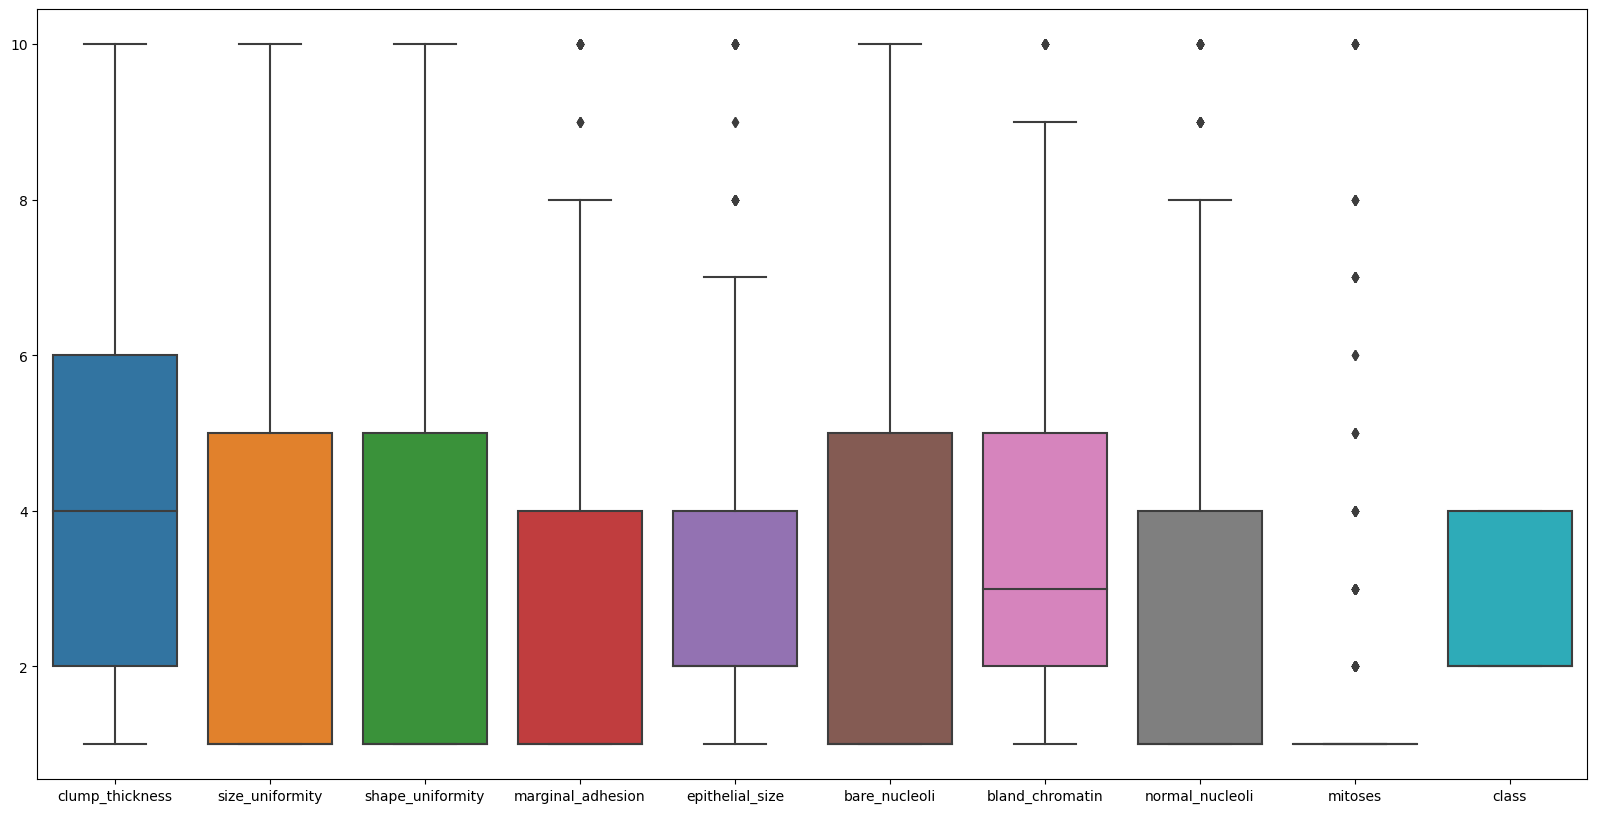

In [198]:
plt.figure(figsize = (20,10))
sns.boxplot(data = breast_cancer_data_df)

<Axes: >

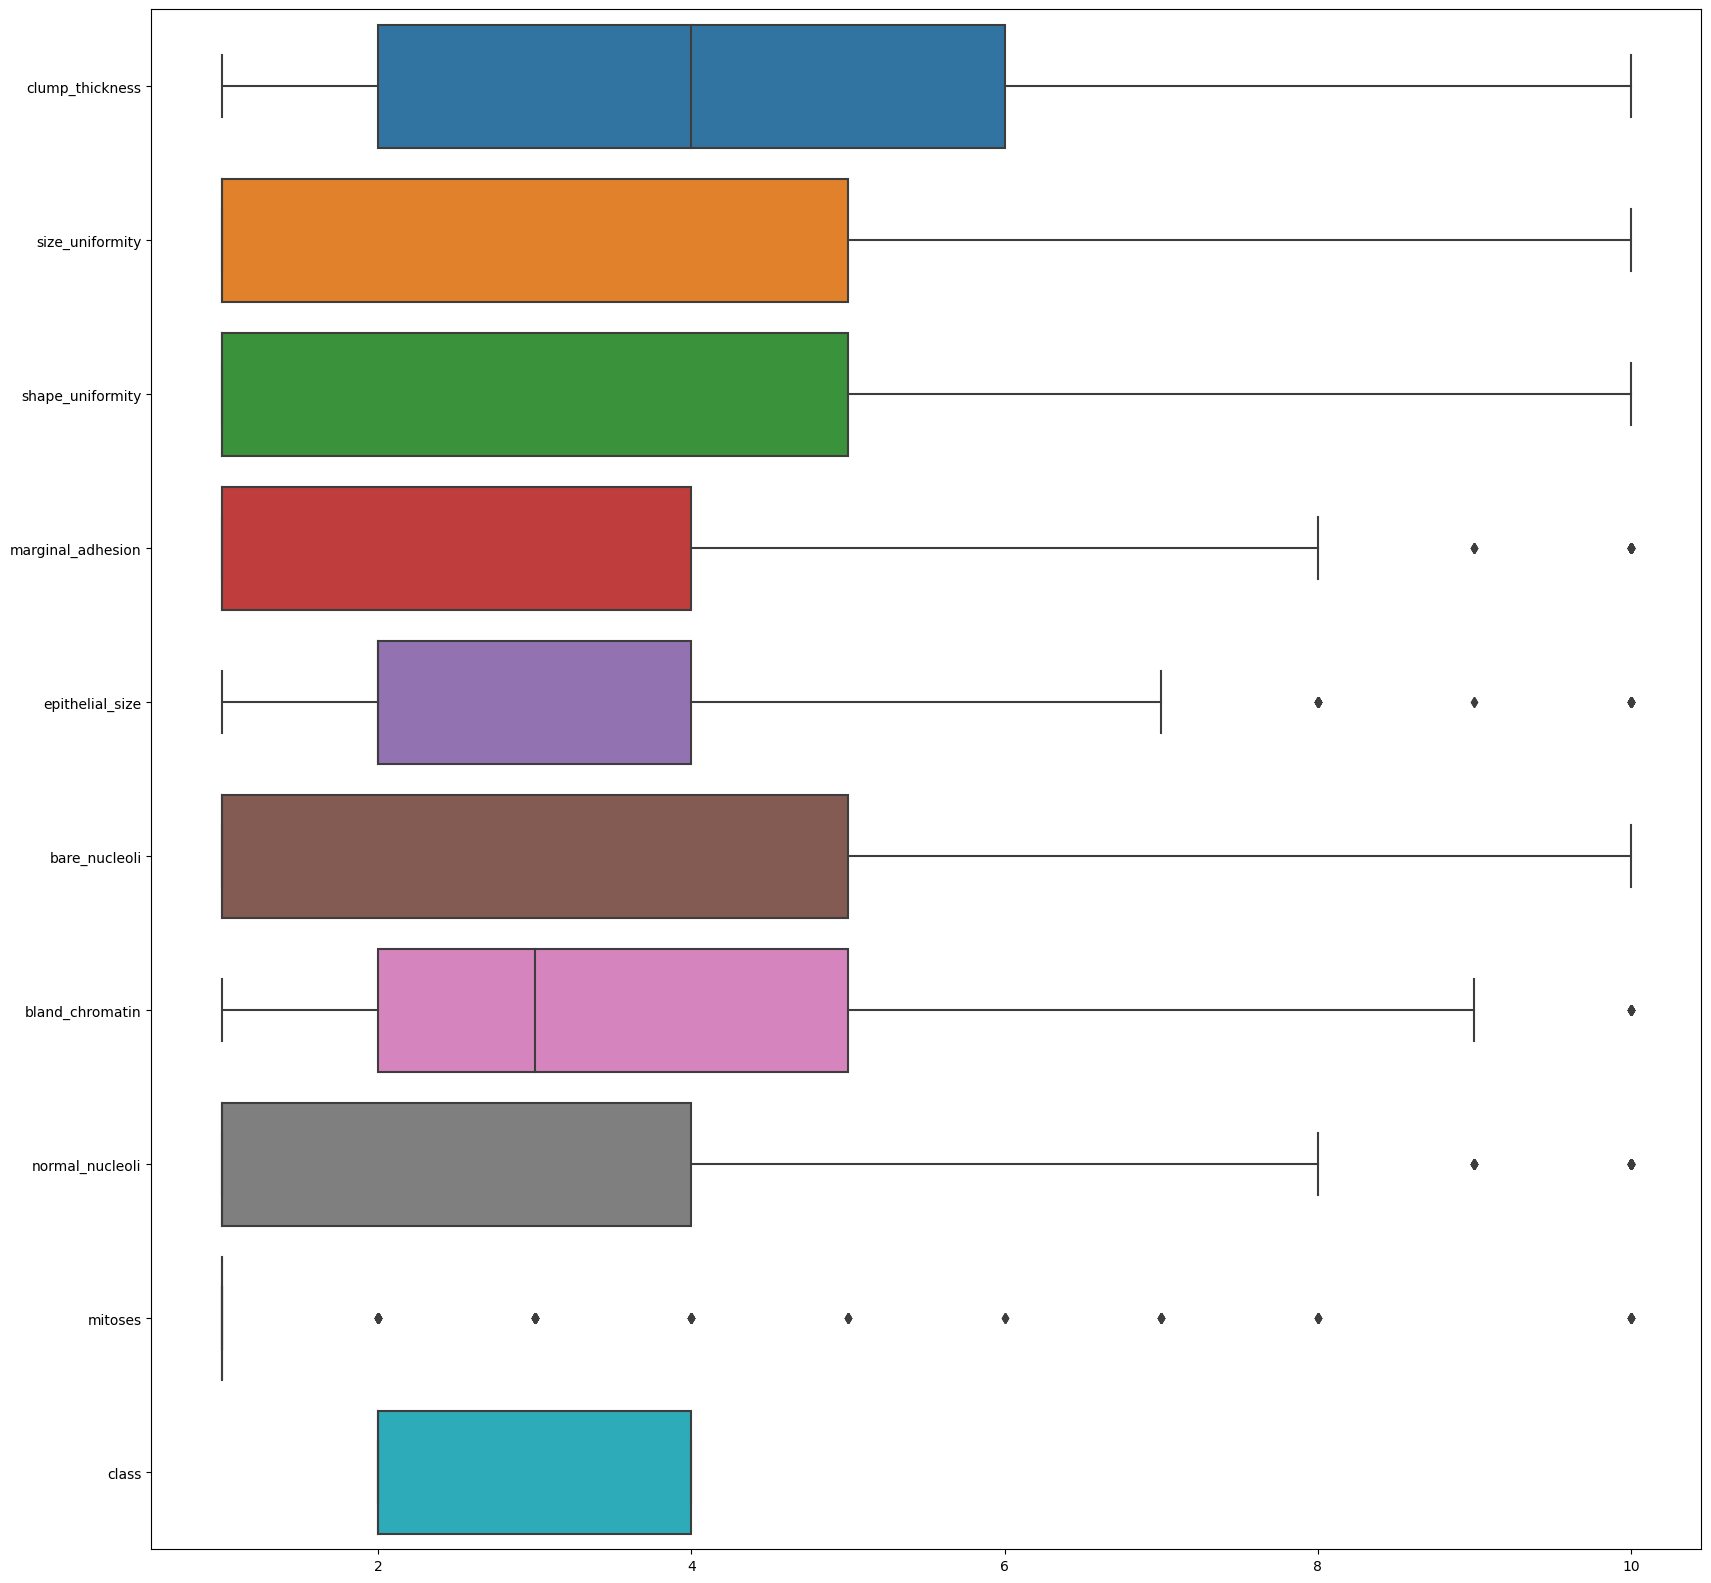

In [199]:
plt.figure(figsize = (20,20))
sns.boxplot(data = breast_cancer_data_df, orient = 'h')

In [200]:
breast_cancer_data_df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


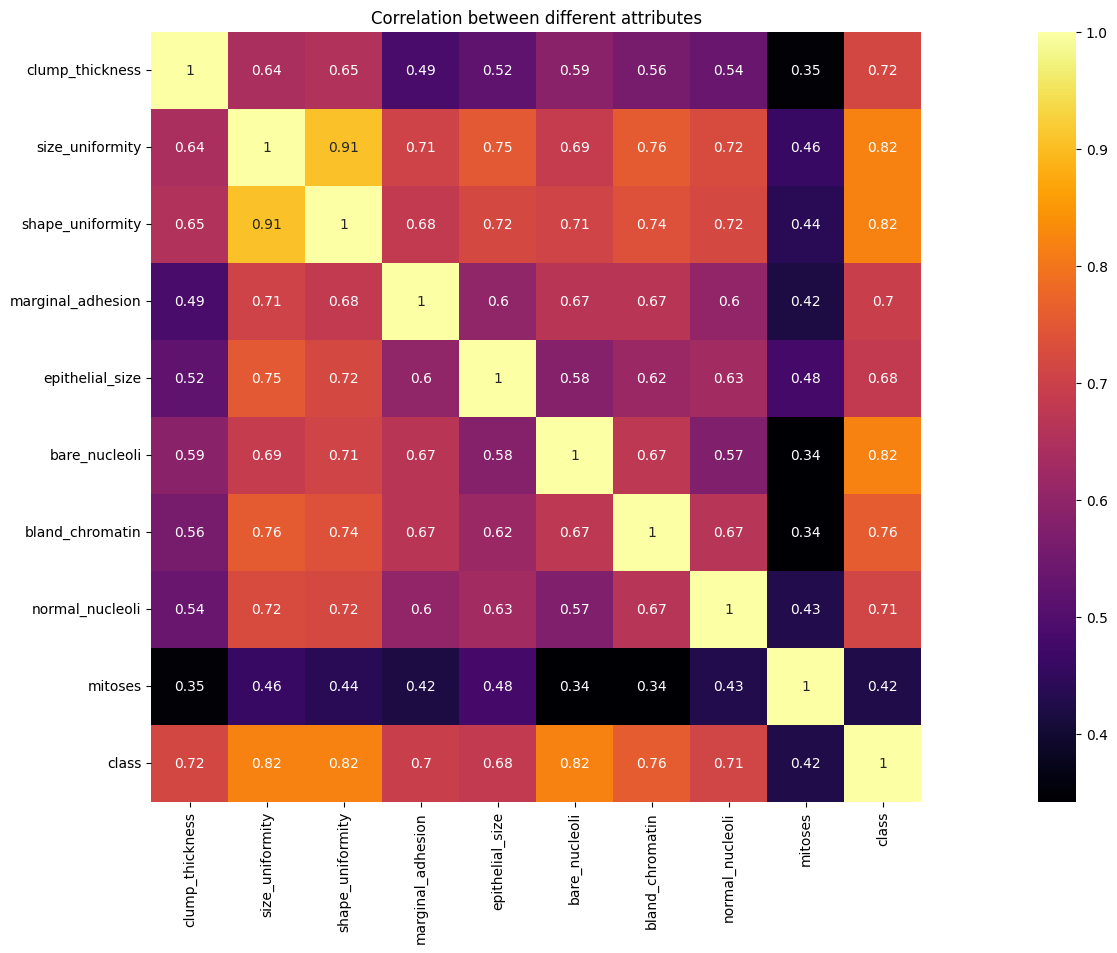

In [201]:
plt.figure(figsize = (30,10))
sns.heatmap(breast_cancer_data_df.corr(), vmax = 1, square = True, annot = True, cmap = 'inferno')
plt.title('Correlation between different attributes')
plt.show()

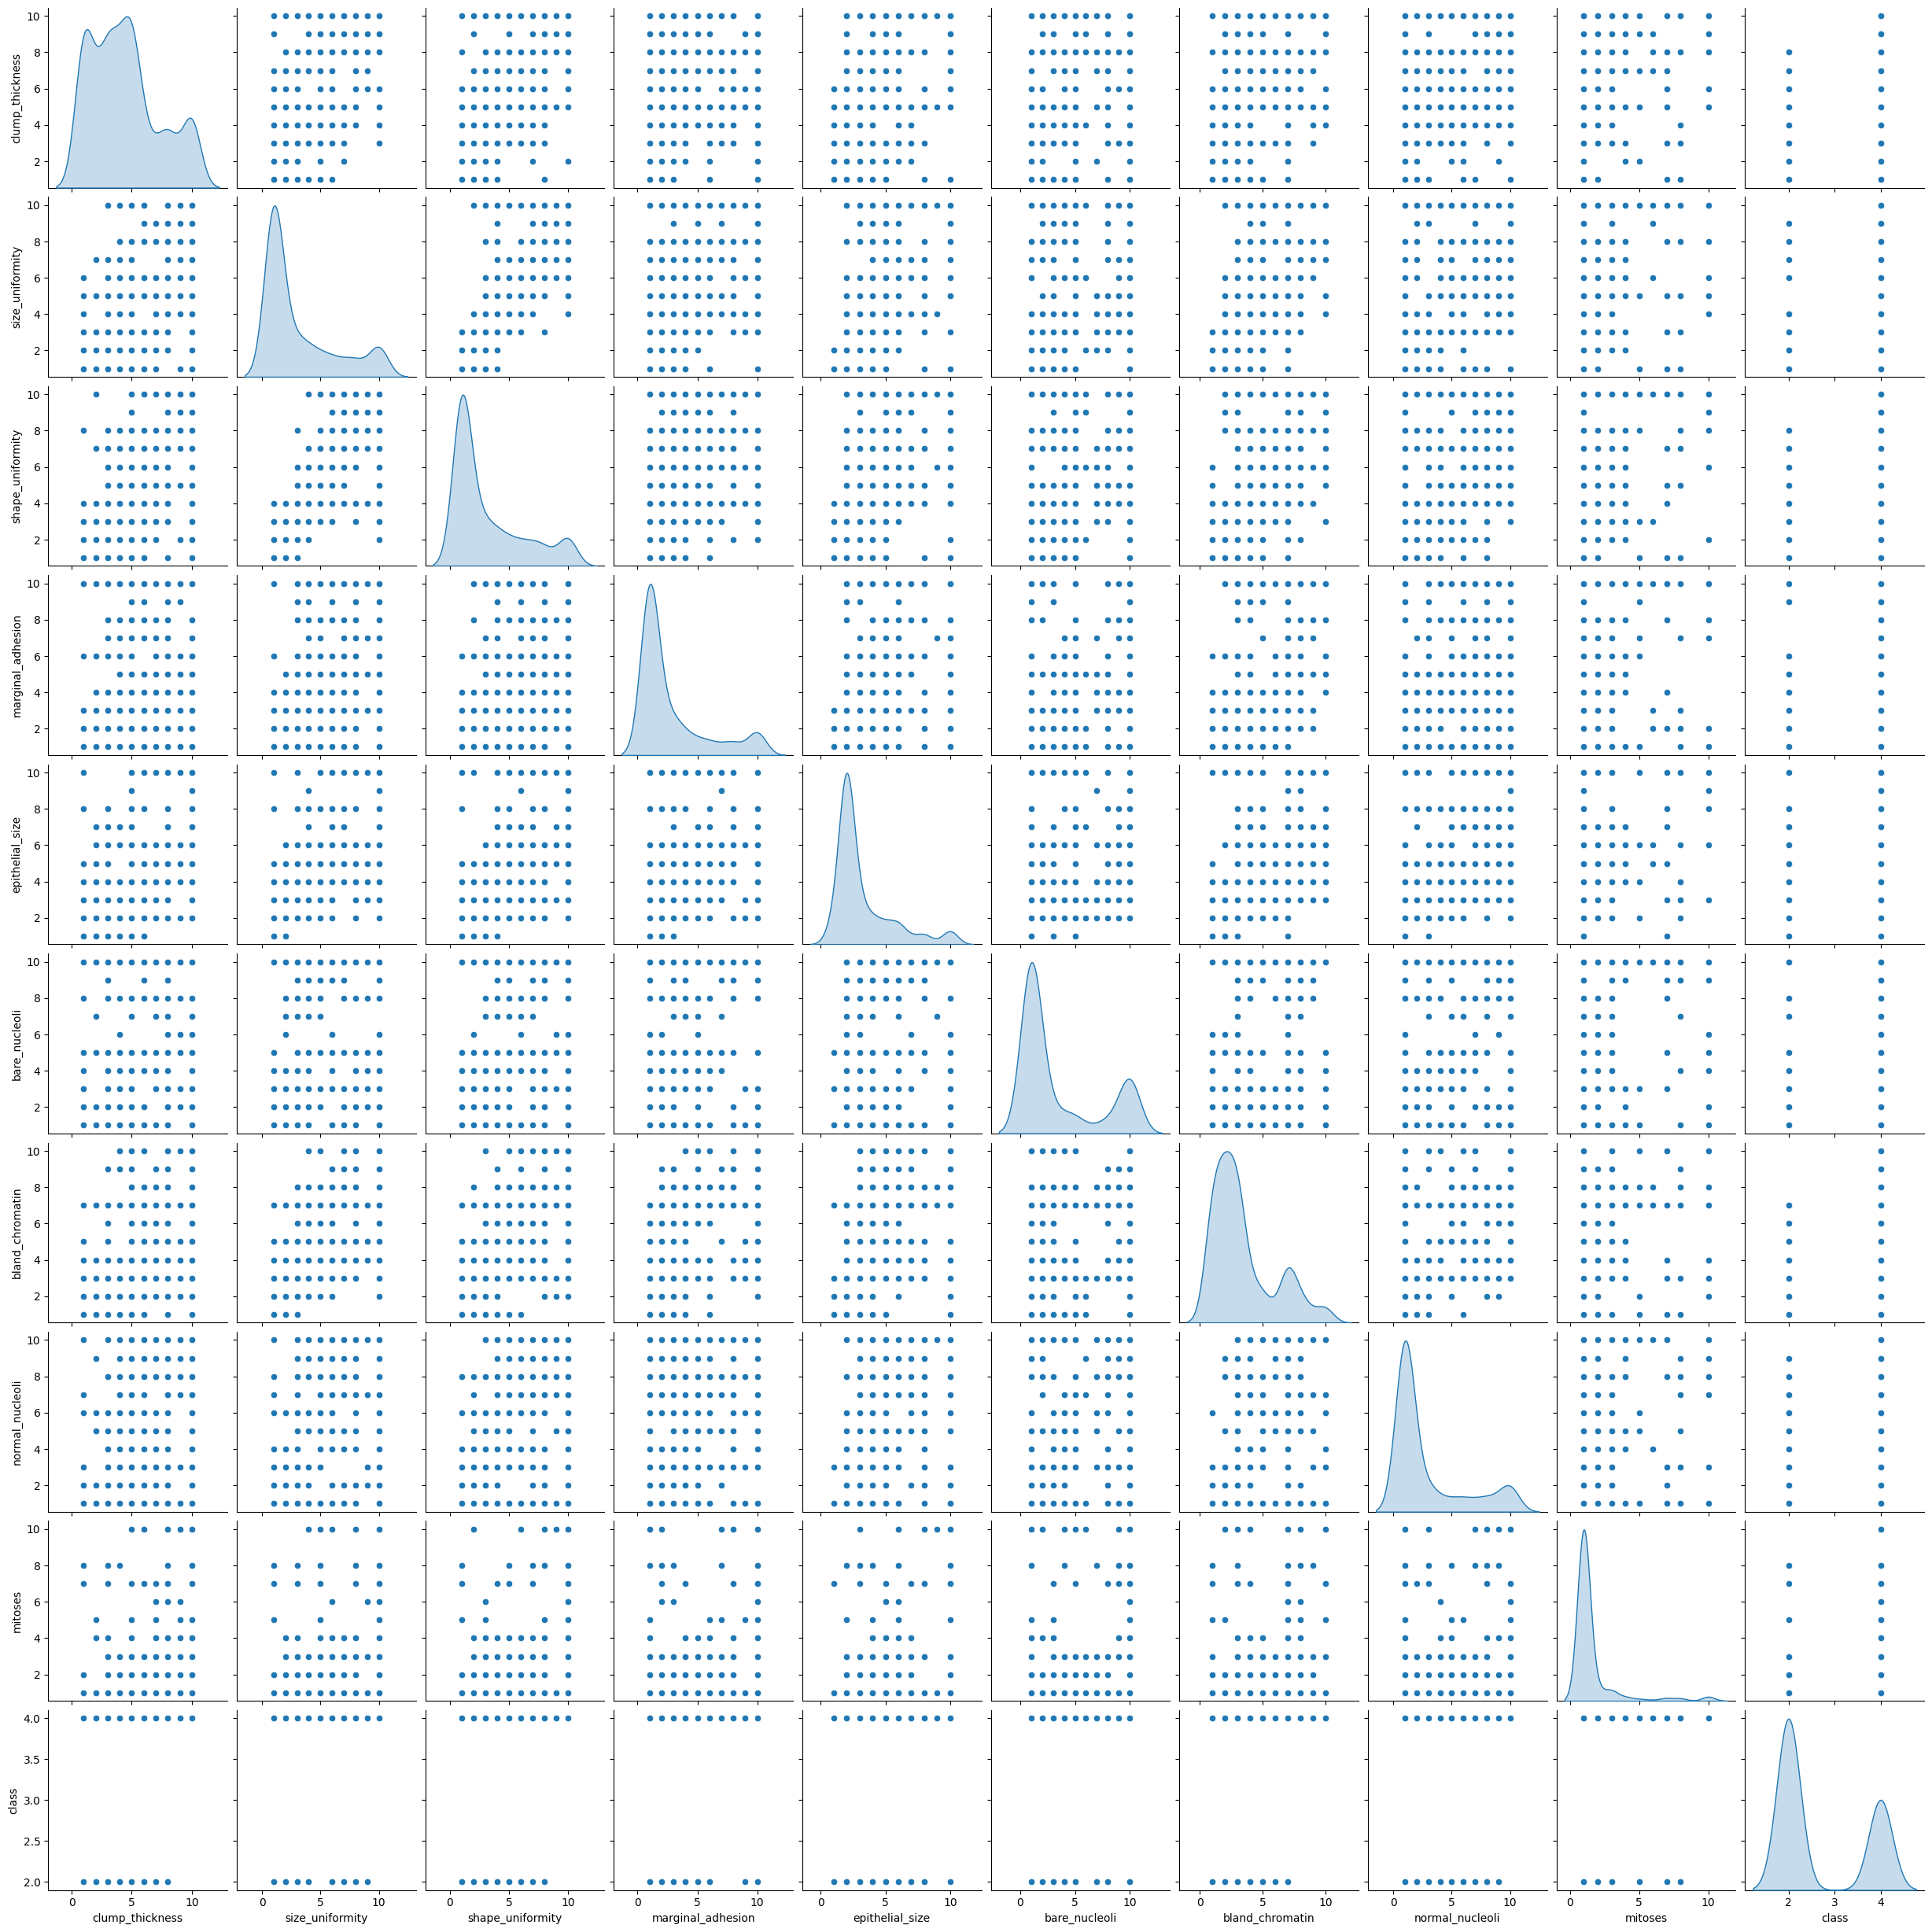

In [202]:
sns.pairplot(breast_cancer_data_df, diag_kind = 'kde')

## Model Building

In [203]:
breast_cancer_data_df.tail()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [204]:
X = breast_cancer_data_df.drop('class', axis = 1)
Y = breast_cancer_data_df['class']

In [205]:
print(X)

     clump_thickness  size_uniformity  shape_uniformity  marginal_adhesion  \
0                  5                1                 1                  1   
1                  5                4                 4                  5   
2                  3                1                 1                  1   
3                  6                8                 8                  1   
4                  4                1                 1                  3   
..               ...              ...               ...                ...   
694                3                1                 1                  1   
695                2                1                 1                  1   
696                5               10                10                  3   
697                4                8                 6                  4   
698                4                8                 8                  5   

     epithelial_size  bare_nucleoli  bland_chromatin  normal_nu

In [206]:
print(Y)

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64


## Importing libraries for the model

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics

## Splitting the data into training and testing data

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 3)

In [209]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(699, 9)
(489, 9)
(210, 9)


## KNeighborsClassifier

In [210]:
KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

In [211]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

In [212]:
prediction = KNN.predict(X_test)
print(prediction)

[4 4 2 2 2 4 2 4 2 4 4 2 4 2 2 4 4 4 2 2 4 4 4 2 4 2 2 4 4 2 2 2 2 4 2 4 4
 4 2 2 2 2 4 4 4 2 4 2 4 2 2 4 4 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 2 2 2
 4 2 4 2 2 4 2 2 2 4 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 4 4 2 2 4 4 2 2 2
 2 2 2 4 2 2 2 4 2 4 4 4 4 2 4 4 2 2 4 4 4 2 2 4 2 4 4 4 4 2 2 2 2 2 2 2 2
 2 4 2 2 4 4 2 4 4 4 4 4 2 2 2 4 2 2 2 2 2 4 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4
 4 2 2 4 4 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 4 2 2 4 4]


## Prediction Score

In [213]:
score = KNN.score(X_test, Y_test) * 100
print(score)

97.14285714285714


## SVM

In [214]:
svc = SVC(gamma = 0.025, C = 3)
svc.fit(X_train, Y_train)

SVC(C=3, gamma=0.025)

In [215]:
prediction2 = svc.predict(X_test)
print(prediction)

[4 4 2 2 2 4 2 4 2 4 4 2 4 2 2 4 4 4 2 2 4 4 4 2 4 2 2 4 4 2 2 2 2 4 2 4 4
 4 2 2 2 2 4 4 4 2 4 2 4 2 2 4 4 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 2 2 2
 4 2 4 2 2 4 2 2 2 4 2 2 2 4 4 4 2 4 4 2 4 2 2 2 2 2 2 2 4 4 2 2 4 4 2 2 2
 2 2 2 4 2 2 2 4 2 4 4 4 4 2 4 4 2 2 4 4 4 2 2 4 2 4 4 4 4 2 2 2 2 2 2 2 2
 2 4 2 2 4 4 2 4 4 4 4 4 2 2 2 4 2 2 2 2 2 4 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4
 4 2 2 4 4 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 4 2 2 4 4]


## Prediction score

In [216]:
score2 = svc.score(X_test, Y_test) * 100
print(score2)

96.66666666666667


In [217]:
KNNPredictions = pd.DataFrame(prediction)
SVCPredictions = pd.DataFrame(prediction2)

In [218]:
df = pd.concat([KNNPredictions, SVCPredictions], axis = 1)
print(df)

     0  0
0    4  4
1    4  4
2    2  2
3    2  2
4    2  2
..  .. ..
205  4  2
206  2  2
207  2  2
208  4  4
209  4  4

[210 rows x 2 columns]


In [219]:
df.columns = [['KNNPredictions', 'SVCPredictions']]
print(df)

    KNNPredictions SVCPredictions
0                4              4
1                4              4
2                2              2
3                2              2
4                2              2
..             ...            ...
205              4              2
206              2              2
207              2              2
208              4              4
209              4              4

[210 rows x 2 columns]


## KNN Classification report

In [220]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           2       0.99      0.96      0.98       130
           4       0.94      0.99      0.96        80

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



## SVC Classification report

In [221]:
print(classification_report(Y_test, prediction2))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97       130
           4       0.94      0.97      0.96        80

    accuracy                           0.97       210
   macro avg       0.96      0.97      0.96       210
weighted avg       0.97      0.97      0.97       210



## KNN - Confusion matrix

In [222]:
knn_confusion_matrix = metrics.confusion_matrix(Y_test, prediction, labels = [2,4])

In [223]:
knn_confusion_matrix_df = pd.DataFrame(knn_confusion_matrix, index = [i for i in [2,4]], columns = [i for i in ['Predict B', 'Predict M']])

<Axes: >

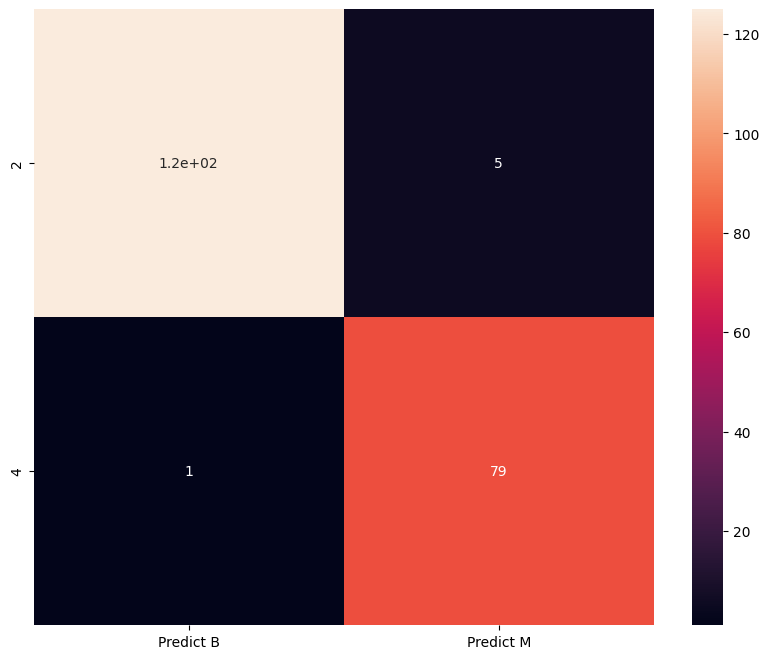

In [224]:
plt.figure(figsize = (10,8))
sns.heatmap(knn_confusion_matrix_df, annot = True)

## SVC - Confusion matrix

In [225]:
svc_confusion_matrix = metrics.confusion_matrix(Y_test, prediction2, labels = [2,4])

In [226]:
svc_confusion_matrix_df = pd.DataFrame(svc_confusion_matrix, index = [i for i in [2,4]], columns = [i for i in ['Predict B', 'Predict M']])

<Axes: >

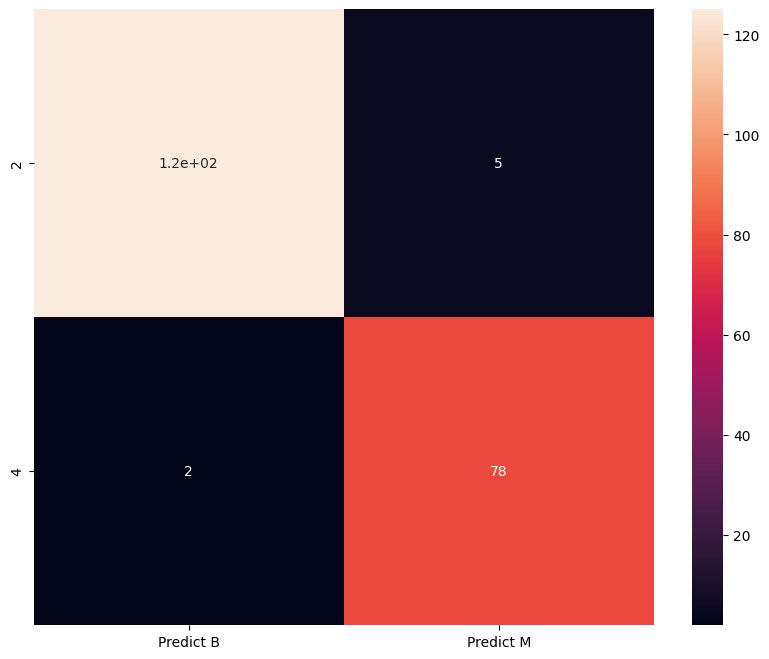

In [227]:
plt.figure(figsize = (10,8))
sns.heatmap(svc_confusion_matrix_df, annot = True)

## Conclusion

The above concludes the data science project of Breast Cancer Prediction.